# UQ PUG 6
_Plotting with matplotlib_
\
\
The package `matplotlib` contains very popular plotting functions which are used widely by those who use Python for their data analysis.

Stands for **mat**hematical **plot**ing **lib**rary

### Getting started

You might think that we simply use `import matplotlib` to include it. However, it's set up a bit differently - we need to use a _submodule_ of the package to interact with the plotting mechanisms: `matplotlib.pyplot`. By convention, use `as plt`.

In [2]:
import matplotlib.pyplot as plt

### Importing data 

Use the `pandas` module

In [31]:
import pandas as pd

# data = pd.read_csv("my_file_path")

pd.DataFrame(columns = ["Name", "Age"], data = [["Bob", 47]])

,Name,Age
0,Bob,47


### Basic plots with pyplot

We can quickly produce plots with `pyplot`:

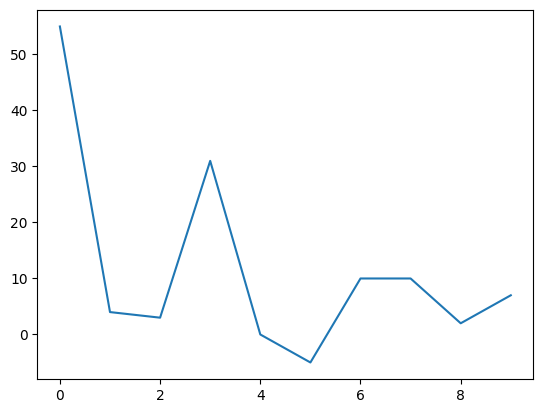

In [6]:
x_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_data = [55, 4, 3, 31, 0, -5, 10, 10 , 2, 7]

plt.plot(x_data, y_data)
plt.show()

As well as add appropriate labels:

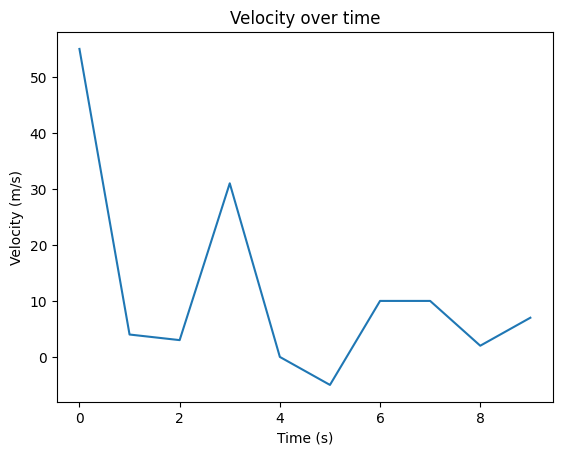

In [8]:
x_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_data = [55, 4, 3, 31, 0, -5, 10, 10 , 2, 7]

plt.plot(x_data, y_data)

plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity over time")

plt.show()

#### Changing the colour, style etc.

Changing how the visualisation looks is easy, if you know the symbol. Add a third string argument to the plot function which specifies the appearance. 

Here, `'r'` means red and `'o'` means circles. For other options, check the [full reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

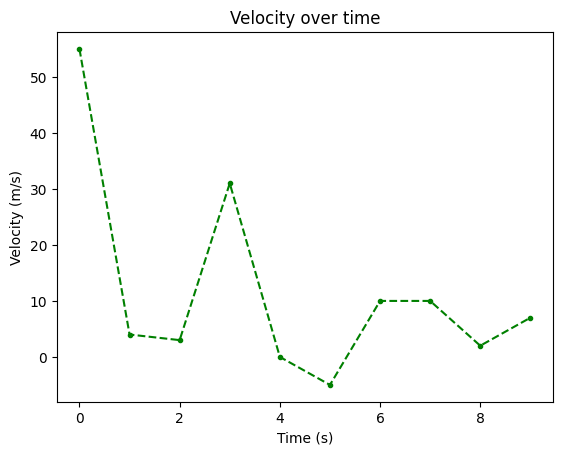

In [21]:
x_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_data = [55, 4, 3, 31, 0, -5, 10, 10 , 2, 7]

plt.plot(x_data, y_data, "og--")

plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity over time")

plt.show()

#### Creating subplots

Maybe you want to plot those two plots separately?

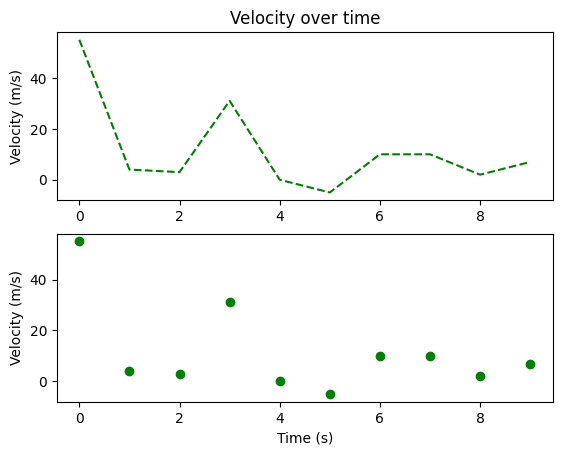

In [26]:
x_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_data = [55, 4, 3, 31, 0, -5, 10, 10 , 2, 7]

# plt.subplot(n rows, n cols, which plot are we at)


plt.subplot(2, 1, 1)
plt.title("Velocity over time")
plt.plot(x_data, y_data, "g--")
plt.ylabel("Velocity (m/s)")

plt.subplot(2, 1, 2)
plt.plot(x_data, y_data, "og")


plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")


plt.show()

### Plotting with data



<BarContainer object of 3 artists>

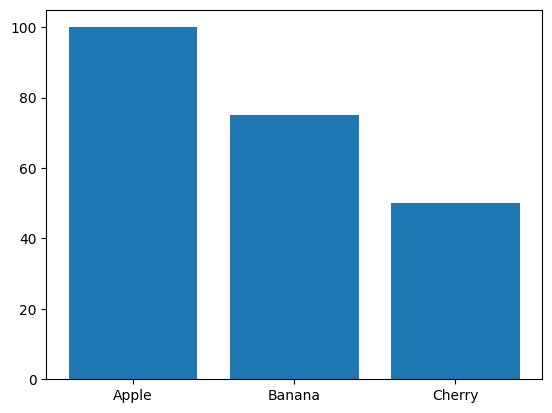

In [28]:
import pandas as pd

fruit_data = pd.DataFrame(data = [["Apple", 100], ["Banana", 75], ["Cherry", 50]],
                          columns = ["Fruit", "Sales"])
fruit_data

plt.bar(x = "Fruit", height = "Sales", data = fruit_data)

#plt.subplot(1,2,1)
#plt.bar(x = "Fruit", 
#        height = "Sales", 
#        data = fruit_data, 
#        hatch = "////")

#plt.subplot(1,2,2)
#plt.plot(fruit_data["Sales"], "ro--")

### Using the "Axes" (explicit) interface

Here's the nitty gritty. Until now, we've used functions from `pyplot` to make adjustments to our plots. Functions like
* `plt.plot()`
* `plt.bar()`
* `plt.xlabel()`

This is a function-oriented approach, it's the MATLAB way. However, `matplotlib` offers an alternative _object-oriented_ way, which works a little differently. **Most examples online use this approach**, so it's important to know what's going on. It's more complicated, but it's also more versatile.

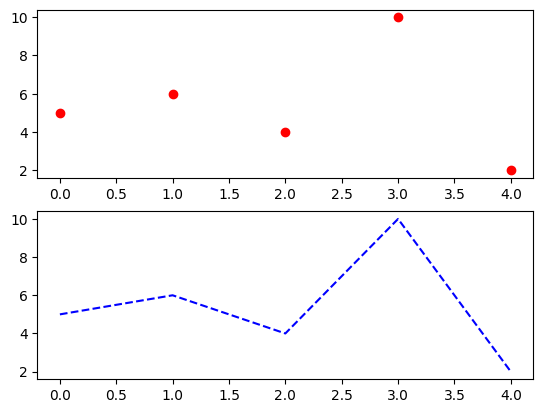

In [69]:
x_data = [0,1,2,3,4]
y_data = [5,6,4,10,2]

# Set up the axes:
# fig contains the full image
# axs contains each individual plot (it's an array of Axes objects)

fig, axs = plt.subplots(2,1)

# Go through each Axes object in axs to plot
axs[0].plot(x_data, y_data, "ro")
axs[1].plot(x_data, y_data, "b--")

# Plot is here a *method* of an axs object (a function stored inside it) rather than a function inside pyplot

plt.show()

In [ ]:
# Read data
fruit = pd.read_csv("apples_and_oranges.csv")

# pyplot approach

# Scatter plot of Size vs Weight
plt.subplot(1,2,1)
plt.plot("Weight", "Size", ".", data = fruit)
plt.xlabel("Weight")
plt.ylabel("Size")

# Bar plot of average size vs fruit
plt.subplot(1,2,2)
plt.bar(x = "Class", height = "Size", data = fruit)
plt.xlabel("Fruit")
plt.ylabel("Average Size")

plt.show()

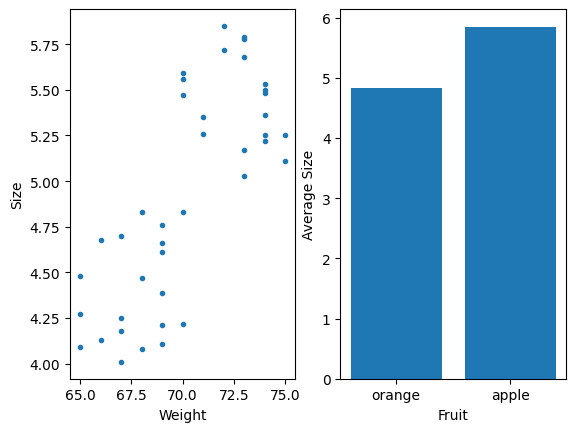

In [127]:
# Axes level approach
fig, axs = plt.subplots(1,2)

# Scatter plot of Size vs Weight
axs[0].plot("Weight", "Size", ".", data = fruit)
axs[0].set_xlabel("Weight")
axs[0].set_ylabel("Size")

# Bar plot of Average Size vs Weight
axs[1].bar(x = "Class", height = "Size", data = fruit)
axs[1].set_xlabel("Fruit")
axs[1].set_ylabel("Average Size")

plt.show()

In [55]:
# Tuple example

# These are lists, we can change them (mutable)
myList = [1,2,"apple", 5.5, [1,2,3]]

#print(myList)

myList[3] = "banana"

#print(myList)

# Tuples, cannot be edited (immutable)

myTuple = (1,2,"apple", "banana", [1,2,3])


(1, 2, 'apple', 5.5, [1, 2, 3])


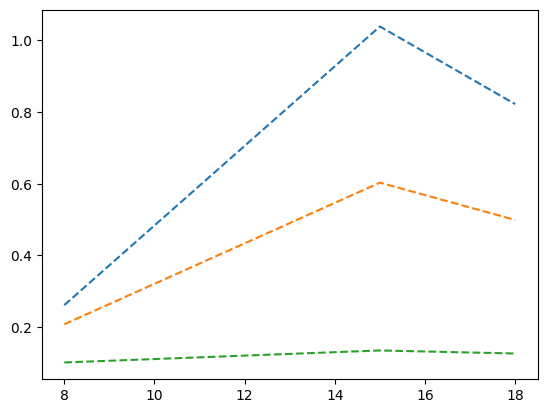

In [81]:
import pandas as pd

# I have these Optical Density in 750nm data that show the growth curve for each species
OD750_data = [["Species",8,15, 18],
            ["Nannochloropsis", 0.2615, 1.0385, 0.822],
            ["Phaeodactylum", 0.208, 0.603, 0.499],
            ["Tisochrysis", 0.1015, 0.135, 0.1265]]

OD750_data = pd.DataFrame(columns = OD750_data[0], data = OD750_data[1:4])

OD750_data = pd.melt(OD750_data, "Species")

plt.plot("variable", "value", "--", data = OD750_data[OD750_data["Species"] == "Nannochloropsis"])
plt.plot("variable", "value", "--", data = OD750_data[OD750_data["Species"] == "Phaeodactylum"])
plt.plot("variable", "value", "--", data = OD750_data[OD750_data["Species"] == "Tisochrysis"])

plt.show()

# how do I turn this table into line graphs with 3 growth curves for 3 species?




In [103]:
## Code for Q3
import numpy as np

#%%
def total_claim_amount(paths, lambda_parameter, mu_parameter, step_size):

    #Simulate the number of claims (N): Poisson distribution
    num_claims = np.random.poisson(lam = lambda_parameter*step_size, 
                                    size = paths)
    dime = np.max(num_claims) 
    
    #Simulate claim sizes (X): Exponential distribution
    # claim_sizes = np.random.exponential(scale = mu_parameter, 
    #                                     size = (paths, dime))
    # claim_sizes = np.random.pareto(a = mu_parameter, 
    #                                     size = (paths, dime))
    claim_sizes = np.random.weibull(a = mu_parameter, 
                                        size = (paths, dime))

    #check to create True (1) and False (0)
        #So, only the correct number of claims are counted
    check = np.arange(dime) < num_claims[:, None]

    #Calculate total claim amount for all paths
        #sum across the rows: axis = 1
        #total was a row vector: reshaped into column vector
    total = np.sum(claim_sizes * check, axis=1).reshape(paths, 1)

    #Calculate mean and standard deviation of total claim amounts
    mean_total = np.mean(total)
    std_total = np.std(total)
    
    # print("Mean total claim amount:", mean_total)
    # print("Standard deviation of total claim amount:", std_total)
    return total, mean_total, std_total

def premium(lambda_parameter, mu_parameter, step_size):
    p = lambda_parameter * mu_parameter * step_size
    return p

#%% Parameters
M = 10**3  #Number of paths
N = 360 #Number of time steps (days)
lambda_parameter = 12 #Poisson distribution parameter for claim number process
                            #1 claim month
mu_parameter = 1 #Exponential distribution parameter for claim size process
                    #mean claim size is $1

Reserve = np.zeros((M,N))
Reserve[:,0] = 100 * mu_parameter * np.ones((M,))

#Compute premium income
P = premium(lambda_parameter, mu_parameter, 1/N) * np.ones((M,1))

#%%

for n in range(N - 1):
    
    #Compute total claim amount process
    S,_,_ = total_claim_amount(M, lambda_parameter, mu_parameter, 1/N)

    print(Reserve[:,0])
    #Compute reserve for the next time step
    Reserve[:,n+1] = Reserve[:,n].reshape(M, 1) + (P - S).reshape(M, 1)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 

ValueError: could not broadcast input array from shape (1000,1) into shape (1000,)

In [115]:
# What are conditions?

# 'if' statements. These are the control blocks for your code, they're logical filters.

a = 10
b = 20

print(a>b)

# Checks if a > b
if a > b:
    print("a is greater than b!")
    print("Everything that is indented will run")


    print("see!")
    
# elif statements only check if the previous statements failed! 
elif a == b:
    print("We also checked if they were the same. They are!")
    
elif a < 0:
    print("a is a negative number and less than b")

# else statements capture everything that failed. They don't have a condition
else:
    print("Everything failed. a must be greater than 0 and less than b")
    

False
Everything failed. a must be greater than 0 and less than b
